In [77]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

import geopandas as gpd
import geodatasets

import hvplot
import hvplot.pandas

Open the file

In [78]:
fname = 'WaveTimeSeries_ERA5_CanadianBorder_to_Nuvuk_10mDepth.nc'

fpath = os.path.join(os.getcwd(), "raw_datasets/engelstad/", fname)

ds = xr.open_dataset(fpath, chunks={'t':1000})

print(ds)

<xarray.Dataset> Size: 11GB
Dimensions:     (time: 119800, numberOfCharacters: 11, transect: 2381,
                 longitude: 2381, latitude: 2381)
Coordinates:
  * time        (time) datetime64[ns] 958kB 1979-01-01 ... 2019-12-31T21:00:00
    transect    (numberOfCharacters, transect) |S1 26kB dask.array<chunksize=(11, 2381), meta=np.ndarray>
  * longitude   (longitude) float32 10kB -145.5 -145.5 -145.5 ... -155.0 -155.0
  * latitude    (latitude) float32 10kB 70.1 70.1 70.11 ... 71.18 71.18 71.18
Dimensions without coordinates: numberOfCharacters
Data variables:
    depth       (transect) float32 10kB dask.array<chunksize=(2381,), meta=np.ndarray>
    Hs          (transect, time) float32 1GB dask.array<chunksize=(2381, 119800), meta=np.ndarray>
    Tm01        (transect, time) float32 1GB dask.array<chunksize=(2381, 119800), meta=np.ndarray>
    Dm          (transect, time) float32 1GB dask.array<chunksize=(2381, 119800), meta=np.ndarray>
    Flag_D      (transect, time) float32 1GB

Or this is how Kees does it:

In [ ]:
import netCDF4 as nc

# Open the NetCDF file
file_path = 'your_file.nc'  # Replace with your file path
dataset = nc.Dataset(fpath, 'r')

# Explore the file to see the variable names
print(dataset.variables.keys())  # This will show the available variables in the NetCDF file

# Assuming the variable names are 'longitude' and 'latitude', adjust if necessary
longitude = dataset.variables['longitude'][:]  # Replace 'longitude' with the actual name if different
latitude = dataset.variables['latitude'][:]    # Replace 'latitude' with the actual name if different

# Close the dataset after reading
dataset.close()

# Print the longitude and latitude data
print("Longitude:", longitude)
print("Latitude:", latitude)

Let's have a look at the decoded transect id's.

In [4]:
transect_ids = []

for row in ds.transect.values.T:
    id = ''.join(x.decode('UTF-8') for x in row)
    transect_ids.append(id)
    
transect_ids = np.array(transect_ids, dtype=str)

print(transect_ids)

['ECB_10_1298' 'ECB_10_1306' 'ECB_10_1314' ... 'SWB_9_608  ' 'SWB_9_616  '
 'SWB_9_624  ']


Let's plot these points on a map, to see if these id's make sense. First construct a geopandas dataframe.

In [23]:
gdf = gpd.GeoDataFrame(
    pd.DataFrame(
        {
            "ID":transect_ids,
            "Color":np.array(['red' if 'EEB' in x else 'blue' for x in transect_ids], dtype='str'),
            'Longitude':ds.longitude.values,
            'Latitude':ds.latitude.values
        }
    ),
    geometry=gpd.points_from_xy(ds.longitude.values, ds.latitude.values),
    crs='4326'
)

c:\Users\bruij_kn\AppData\Local\mambaforge\envs\thesis\Lib\site-packages\geopandas\geodataframe.py:57: UserWarning: Cannot set the CRS, falling back to None. The CRS support requires the 'pyproj' package, but it is not installed or does not import correctly. The functions depending on CRS will raise an error or may produce unexpected results.
  data.crs = crs
c:\Users\bruij_kn\AppData\Local\mambaforge\envs\thesis\Lib\site-packages\geopandas\geodataframe.py:409: UserWarning: Cannot set the CRS, falling back to None. The CRS support requires the 'pyproj' package, but it is not installed or does not import correctly. The functions depending on CRS will raise an error or may produce unexpected results.
  level.crs = crs


In [25]:
geodatasets.data.flatten().keys()

dict_keys(['geoda.airbnb', 'geoda.atlanta', 'geoda.cars', 'geoda.charleston1', 'geoda.charleston2', 'geoda.chicago_health', 'geoda.chicago_commpop', 'geoda.chile_labor', 'geoda.cincinnati', 'geoda.cleveland', 'geoda.grid100', 'geoda.groceries', 'geoda.guerry', 'geoda.health', 'geoda.health_indicators', 'geoda.hickory1', 'geoda.hickory2', 'geoda.home_sales', 'geoda.houston', 'geoda.juvenile', 'geoda.lansing1', 'geoda.lansing2', 'geoda.lasrosas', 'geoda.liquor_stores', 'geoda.malaria', 'geoda.milwaukee1', 'geoda.milwaukee2', 'geoda.ncovr', 'geoda.natregimes', 'geoda.ndvi', 'geoda.nepal', 'geoda.nyc', 'geoda.nyc_earnings', 'geoda.nyc_education', 'geoda.nyc_neighborhoods', 'geoda.orlando1', 'geoda.orlando2', 'geoda.oz9799', 'geoda.phoenix_acs', 'geoda.police', 'geoda.sacramento1', 'geoda.sacramento2', 'geoda.savannah1', 'geoda.savannah2', 'geoda.seattle1', 'geoda.seattle2', 'geoda.sids', 'geoda.sids2', 'geoda.south', 'geoda.spirals', 'geoda.stlouis', 'geoda.tampa1', 'geoda.us_sdoh', 'ny.bb

And we plot.

In [94]:
masked_gdf = gdf.query("Longitude > -143.75").query("Longitude < -143.62")

points = masked_gdf.hvplot.points(geo=True,
            tiles="ESRI", color=masked_gdf.Color, tools=['tap'])

points

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (_color)

In [98]:
display(masked_gdf)

,ID,Color,Longitude,Latitude,geometry
492,EEB_10_2417,red,-143.623734,70.157799,POINT (-143.62373 70.1578)
493,EEB_10_2425,red,-143.634323,70.156006,POINT (-143.63432 70.15601)
494,EEB_10_2433,red,-143.645035,70.155083,POINT (-143.64503 70.15508)
495,EEB_10_2441,red,-143.650314,70.154205,POINT (-143.65031 70.15421)
496,EEB_10_2449,red,-143.655716,70.154160,POINT (-143.65572 70.15416)
497,EEB_10_2457,red,-143.666412,70.153236,POINT (-143.66641 70.15324)
498,EEB_10_2465,red,-143.677094,70.152313,POINT (-143.67709 70.15231)
499,EEB_10_2473,red,-143.687607,70.150566,POINT (-143.68761 70.15057)
500,EEB_10_2481,red,-143.698273,70.149635,POINT (-143.69827 70.14964)
501,EEB_10_2489,red,-143.703506,70.148766,POINT (-143.70351 70.14877)


In [69]:
# print(ds.transect.values[:,0])
# print(ds.coords)
# print(ds.attrs)

Hs = ds.Hs.sel(time='2016-7-31T21:00:00').values

# print(ds.Hs.coords)

print(Hs)

[0.54 0.54 0.54 ... 0.43 0.43 0.43]


Can we use these transect ids as index?

In [95]:
def string_to_numpy_bytes(string):
    # Convert each character in the string to a numpy.bytes_ object
    bytes_array = np.array([np.bytes_(char.encode('utf-8')) for char in string], dtype=np.bytes_)
    return bytes_array

str_key = 'EEB_10_2417'
byte_key = string_to_numpy_bytes(str_key)

print(byte_key)

[b'E' b'E' b'B' b'_' b'1' b'0' b'_' b'2' b'4' b'1' b'7']


Not really.

Then I will just assume the data is consistently ordered, and use indexing to get the correct data points.

In [110]:
lon_min, lon_max = -143.75, -143.62
lat_min, lat_max = 70.12, 70.17

# lat_bi, lon_bi = 70.133940, -143.678497

index = []

for i in range(len(ds.longitude.values)):
    if ds.longitude.values[i] > lon_min and ds.longitude.values[i] < lon_max and ds.latitude.values[i] > lat_min and ds.latitude.values[i] < lat_max:
        index.append(i)

print(index)
print(len(index))

[492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 840, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080]
28


These are the points I am looking for.

Let's look at the data from a single year, to see if it's consistent.

In [143]:
# ds.Hs.values[index[0]]

period = slice("2011-01-01", "2012-01-01")

ds_masked = ds.sel(time=period)
ds_masked = ds_masked.isel(transect=index, longitude=index, latitude=index)

print(ds_masked)

<xarray.Dataset> Size: 3MB
Dimensions:     (time: 2928, numberOfCharacters: 11, transect: 28,
                 longitude: 28, latitude: 28)
Coordinates:
  * time        (time) datetime64[ns] 23kB 2011-01-01 ... 2012-01-01T21:00:00
    transect    (numberOfCharacters, transect) |S1 308B dask.array<chunksize=(11, 28), meta=np.ndarray>
  * longitude   (longitude) float32 112B -143.6 -143.6 -143.6 ... -143.7 -143.7
  * latitude    (latitude) float32 112B 70.16 70.16 70.16 ... 70.15 70.15 70.14
Dimensions without coordinates: numberOfCharacters
Data variables:
    depth       (transect) float32 112B dask.array<chunksize=(28,), meta=np.ndarray>
    Hs          (transect, time) float32 328kB dask.array<chunksize=(28, 2928), meta=np.ndarray>
    Tm01        (transect, time) float32 328kB dask.array<chunksize=(28, 2928), meta=np.ndarray>
    Dm          (transect, time) float32 328kB dask.array<chunksize=(28, 2928), meta=np.ndarray>
    Flag_D      (transect, time) float32 328kB dask.array<chun

Let's have a look at this data.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
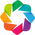

In [144]:
import holoviews as hv
hv.extension('bokeh')

In [146]:
# curves = [(ds_masked.time.values, ds_masked.Hs.values[i,:]) for i in range(len(index))]
curves = [(ds_masked.time.values, ds_masked.Dm.values[i,:]) for i in range(2)]

In [147]:
plot = hv.Curve([])

for i, points in enumerate(curves):
    plot *= hv.Curve(points, label=f'Longitude: {ds_masked.longitude.values[i]:.2f}, Latitude: {ds_masked.latitude.values[i]:.2f}')
    
plot.opts(legend_limit=30, fontscale=1, width=2000, height=500, legend_position='left', show_legend=True).relabel('Wave data')

:Overlay
   .Curve.I                                                                                  :Curve   [x]   (y)
   .Curve.Longitude_colon_hyphen_minus_143_full_stop_62_comma_Latitude_colon_70_full_stop_16 :Curve   [x]   (y)
   .Curve.Longitude_colon_hyphen_minus_143_full_stop_63_comma_Latitude_colon_70_full_stop_16 :Curve   [x]   (y)

In [142]:
print(ds_masked.depth.values)

[10.13   9.879 10.09   9.914 10.09  10.1   10.13   9.921 10.03   9.888
  9.995  9.974 10.02   9.91  10.03  10.09  10.09  10.09   9.914 10.09
  9.966 10.03  10.03  10.03   9.939  9.939  9.939  9.91 ]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


That data seems to be quite consistent. That implies that the data points are indeed ordered consistently. Let's construct a csv file from that.

Start with closing the dataset, and re-masking with the data we need.

In [148]:
ds_masked.close()

ds_masked = ds.isel(transect=index, longitude=index, latitude=index)

ds.close()

print(ds_masked)

<xarray.Dataset> Size: 135MB
Dimensions:     (time: 119800, numberOfCharacters: 11, transect: 28,
                 longitude: 28, latitude: 28)
Coordinates:
  * time        (time) datetime64[ns] 958kB 1979-01-01 ... 2019-12-31T21:00:00
    transect    (numberOfCharacters, transect) |S1 308B dask.array<chunksize=(11, 28), meta=np.ndarray>
  * longitude   (longitude) float32 112B -143.6 -143.6 -143.6 ... -143.7 -143.7
  * latitude    (latitude) float32 112B 70.16 70.16 70.16 ... 70.15 70.15 70.14
Dimensions without coordinates: numberOfCharacters
Data variables:
    depth       (transect) float32 112B dask.array<chunksize=(28,), meta=np.ndarray>
    Hs          (transect, time) float32 13MB dask.array<chunksize=(28, 119800), meta=np.ndarray>
    Tm01        (transect, time) float32 13MB dask.array<chunksize=(28, 119800), meta=np.ndarray>
    Dm          (transect, time) float32 13MB dask.array<chunksize=(28, 119800), meta=np.ndarray>
    Flag_D      (transect, time) float32 13MB dask.arr

This is already a lot more manageable. Let's average the parameters over space to get a time series, and increase resolution to hourly through interpolation.

In [153]:
df = pd.DataFrame(
    data={
        'time': ds_masked.time,
        'Hso(m)': np.mean(ds_masked.Hs.values, axis=0),
        'Tm(s)': np.mean(ds_masked.Tm01.values, axis=0),
        # 'Tp(s)': ,
        'Dm(deg)': np.mean(ds_masked.Dm.values, axis=0),
        # 'Dp(deg)': ,
    }
)

In [154]:
df.head()

,time,Hso(m),Tm(s),Dm(deg)
0,1979-01-01 00:00:00,NaN,NaN,NaN
1,1979-01-01 03:00:00,NaN,NaN,NaN
2,1979-01-01 06:00:00,NaN,NaN,NaN
3,1979-01-01 09:00:00,NaN,NaN,NaN
4,1979-01-01 12:00:00,NaN,NaN,NaN


Now let's interpolate the data to get an hourly resolution.

In [156]:

def resample_and_interpolate(df, time_column='time'):
    # Ensure the time column is set as the DataFrame's index
    df = df.set_index(time_column)
    
    # Resample the DataFrame to a 1-hour frequency
    df_resampled = df.resample('1h').asfreq()
    
    # Interpolate the missing values for all other columns
    df_interpolated = df_resampled.interpolate(method='linear')
    
    # Reset the index to bring 'time' back as a column
    df_interpolated = df_interpolated.reset_index()
    
    return df_interpolated

df_interpolated = resample_and_interpolate(df)

In [158]:
display(df_interpolated.head())
display(df_interpolated.tail())


,time,Hso(m),Tm(s),Dm(deg)
0,1979-01-01 00:00:00,NaN,NaN,NaN
1,1979-01-01 01:00:00,NaN,NaN,NaN
2,1979-01-01 02:00:00,NaN,NaN,NaN
3,1979-01-01 03:00:00,NaN,NaN,NaN
4,1979-01-01 04:00:00,NaN,NaN,NaN


,time,Hso(m),Tm(s),Dm(deg)
359393,2019-12-31 17:00:00,0.445714,3.342858,295.928558
359394,2019-12-31 18:00:00,0.445714,3.342858,295.928558
359395,2019-12-31 19:00:00,0.445714,3.342858,295.928558
359396,2019-12-31 20:00:00,0.445714,3.342858,295.928558
359397,2019-12-31 21:00:00,0.445714,3.342858,295.928558


And let's save this dataframe in the time series folder!

In [159]:
from pathlib import Path

fname = Path("storms_engelstad.csv")

save_path = os.path.join(os.getcwd(), "ts_datasets/", fname)

df_interpolated.to_csv(save_path)